In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# Load data
airports = pd.read_csv("../airports.csv", delimiter=',')
routes = pd.read_csv("../routes.csv", delimiter=',')
#print(airports)
#print(routes)

# Mismatch between airports ID in both tables ಠ_ಠ ??
#print(airportsColombia[airportsColombia['iata_code'] == 'BOG'])
#routes[routes['Source airport'] == 'BOG']

In [3]:
# Filter only arports
airports = airports[(airports['type'] == 'small_airport') | (airports['type'] == 'medium_airport') | (airports['type'] == 'large_airport')]

# Keep only information about airports
routes = routes.drop(['Airline','Airline ID','Codeshare','Stops','Equipment', "Source airport ID", "Destination airport ID"], axis=1)
routes = routes.rename(columns={"Source airport": "source_airport", "Destination airport": "destination_airport"})

In [4]:
# Filter colombian airports
aeroColombia = airports[airports['iso_country'] == 'CO']
airportsColombia1 = aeroColombia[(aeroColombia['type'] == 'small_airport') | (aeroColombia['type'] == 'medium_airport') | (aeroColombia['type'] == 'large_airport')]
airportsColombia1 = airportsColombia1.reset_index()
airportsColombia1 = airportsColombia1.drop(['elevation_ft','continent','iso_country', 'iso_region', 'scheduled_service', 'wikipedia_link', 'keywords', 'home_link', 'local_code', 'index'], axis=1)
airportsColombia1

,id,ident,type,name,latitude_deg,longitude_deg,municipality,gps_code,iata_code
0,41025,ACM,small_airport,Arica Airport,-2.144851,-71.758389,Arica,NaN,ACM
1,40810,AGI,small_airport,El Paraíso Airport,8.128611,-73.584722,Aguachica,NaN,NaN
2,43979,CO-0001,small_airport,Punta Espada Airport,12.075256,-71.125725,Uribia,NaN,NaN
3,316785,CO-0052,small_airport,Loreto North Airstrip,-3.524000,-70.328000,NaN,NaN,NaN
4,317261,CO-0054,small_airport,Ríohacha Highway Strip,11.498800,-72.989200,Ríohacha,NaN,NaN
...,...,...,...,...,...,...,...,...,...
655,6176,SKVP,medium_airport,Alfonso López Pumarejo Airport,10.435000,-73.249500,Valledupar,SKVP,VUP
656,6177,SKVV,medium_airport,Vanguardia Airport,4.167870,-73.613800,Villavicencio,SKVV,VVC
657,30667,SKYA,small_airport,Yaguara Airport,1.544170,-73.933300,San Vicente Del Caguán,SKYA,AYG
658,6178,SKYP,medium_airport,El Yopal Airport,5.319110,-72.384000,El Yopal,SKYP,EYP


In [5]:
# Filter over airports with iata code
airportsColombia = airportsColombia1[airportsColombia1['iata_code'].notna()]
airportsColombia = airportsColombia.reset_index()
airportsColombia = airportsColombia.drop(['index'], axis=1)
airportsColombia

,id,ident,type,name,latitude_deg,longitude_deg,municipality,gps_code,iata_code
0,41025,ACM,small_airport,Arica Airport,-2.144851,-71.758389,Arica,NaN,ACM
1,41597,CO-LCR,small_airport,La Chorrera Airport,-0.733333,-73.016670,La Chorrera,NaN,LCR
2,32342,CO-SNT,small_airport,Las Cruces Airport,7.383220,-73.505402,Sabana De Torres,NaN,SNT
3,35319,CO-TCD,small_airport,Tarapacá Airport,-2.895802,-69.749762,Tarapacá,SKRA,TCD
4,41037,SK-002,small_airport,El Encanto Airport,-1.753333,-73.204722,El Encanto,NaN,ECO
...,...,...,...,...,...,...,...,...,...
136,6175,SKVL,small_airport,Velásquez Airport,5.939040,-74.457000,Puerto Boyacá,SKVL,PYA
137,6176,SKVP,medium_airport,Alfonso López Pumarejo Airport,10.435000,-73.249500,Valledupar,SKVP,VUP
138,6177,SKVV,medium_airport,Vanguardia Airport,4.167870,-73.613800,Villavicencio,SKVV,VVC
139,30667,SKYA,small_airport,Yaguara Airport,1.544170,-73.933300,San Vicente Del Caguán,SKYA,AYG


In [6]:
# Routes involving colombian airports
routesColombia = pd.DataFrame(columns = ['source_airport', 'destination_airport'])

for i in range(len(airportsColombia)):
    
    requestedairport = airportsColombia.loc[i, 'iata_code']
    
    # Maybe some routes are not in both directions
    found1 = routes[routes['source_airport'] == requestedairport]
    found2 = routes[routes['destination_airport'] == requestedairport]
    
    routesColombia = routesColombia.append(found1)
    routesColombia = routesColombia.append(found2)
    
routesColombia = routesColombia.drop_duplicates()
routesColombia = routesColombia.reset_index()
routesColombia = routesColombia.drop(['index'], axis=1)
routesColombia

,source_airport,destination_airport
0,LCR,ACR
1,LCR,LET
2,ACR,LCR
3,LET,LCR
4,TCD,LET
...,...,...
275,UIO,MDE
276,RVE,TME
277,TME,RVE
278,ADZ,PTY


In [7]:
routesColombia['source_airport_name'] =  np.nan
routesColombia['source_airport_lat'] =  np.nan
routesColombia['source_airport_lng'] =  np.nan
routesColombia['source_airport_country'] =  np.nan


routesColombia['destination_airport_name'] =  np.nan
routesColombia['destination_airport_lat'] =  np.nan
routesColombia['destination_airport_lng'] =  np.nan
routesColombia['destination_airport_country'] =  np.nan


# Completing data 
for i in range(len(routesColombia)):
    
    requested_source_airport = routesColombia.loc[i, 'source_airport']
    requested_destination_airport = routesColombia.loc[i, 'destination_airport']
    
    source_airport = airports[airports['iata_code'] == requested_source_airport]
    destination_airport = airports[airports['iata_code'] == requested_destination_airport]
    
    routesColombia.loc[i, 'source_airport_name'] = source_airport['name'].values[0]
    routesColombia.loc[i, 'source_airport_lat'] = source_airport['latitude_deg'].values[0]
    routesColombia.loc[i, 'source_airport_lng'] = source_airport['longitude_deg'].values[0]
    routesColombia.loc[i, 'source_airport_country'] =  source_airport['iso_country'].values[0]

    routesColombia.loc[i, 'destination_airport_name'] = destination_airport['name'].values[0]
    routesColombia.loc[i, 'destination_airport_lat'] = destination_airport['latitude_deg'].values[0]
    routesColombia.loc[i, 'destination_airport_lng'] = destination_airport['longitude_deg'].values[0]
    routesColombia.loc[i, 'destination_airport_country'] =  destination_airport['iso_country'].values[0]

routesColombia

,source_airport,destination_airport,source_airport_name,source_airport_lat,source_airport_lng,source_airport_country,destination_airport_name,destination_airport_lat,destination_airport_lng,destination_airport_country
0,LCR,ACR,La Chorrera Airport,-0.733333,-73.016670,CO,Araracuara Airport,-0.600854,-72.398011,CO
1,LCR,LET,La Chorrera Airport,-0.733333,-73.016670,CO,Alfredo Vásquez Cobo International Airport,-4.193550,-69.943200,CO
2,ACR,LCR,Araracuara Airport,-0.600854,-72.398011,CO,La Chorrera Airport,-0.733333,-73.016670,CO
3,LET,LCR,Alfredo Vásquez Cobo International Airport,-4.193550,-69.943200,CO,La Chorrera Airport,-0.733333,-73.016670,CO
4,TCD,LET,Tarapacá Airport,-2.895802,-69.749762,CO,Alfredo Vásquez Cobo International Airport,-4.193550,-69.943200,CO
...,...,...,...,...,...,...,...,...,...,...
275,UIO,MDE,Mariscal Sucre International Airport,-0.125399,-78.354306,EC,Jose Maria Córdova International Airport,6.164540,-75.423100,CO
276,RVE,TME,Los Colonizadores Airport,6.951868,-71.857179,CO,Gustavo Vargas Airport,6.451080,-71.760300,CO
277,TME,RVE,Gustavo Vargas Airport,6.451080,-71.760300,CO,Los Colonizadores Airport,6.951868,-71.857179,CO
278,ADZ,PTY,Gustavo Rojas Pinilla International Airport,12.583600,-81.711200,CO,Tocumen International Airport,9.071360,-79.383499,PA


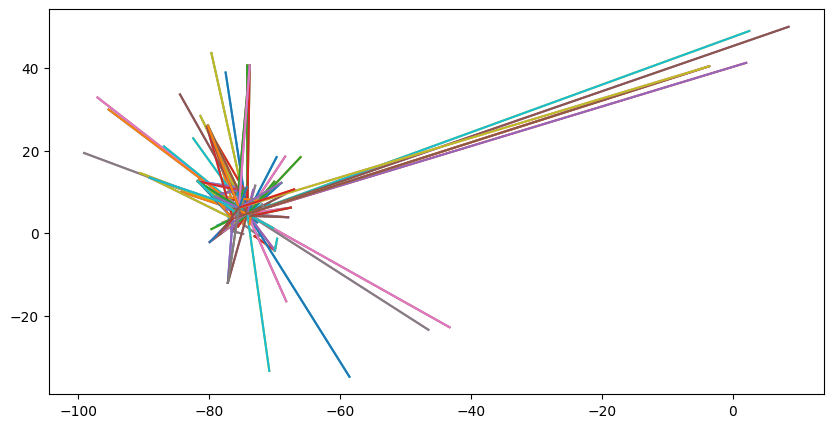

In [8]:
lati = routesColombia.source_airport_lat.to_numpy()
lngi = routesColombia.source_airport_lng.to_numpy()
latf = routesColombia.destination_airport_lat.to_numpy()
lngf = routesColombia.destination_airport_lng.to_numpy()

fig = plt.figure(figsize=(10,5))

for i in range(len(lati)):
    plt.plot([lngi[i], lngf[i]], [lati[i], latf[i]] , '-')

In [9]:
datajson = []

for i in range(len(lati)):
    
    datajson.append({ "lati": lati[i], "lngi": lngi[i], "latf": latf[i], "lngf": lngf[i]})
        
save_file = open("flights.json", "w") 
json.dump(datajson, save_file, indent = 6) 
save_file.close()  

In [10]:
datajsonairports = []

for i in range(len(airportsColombia1)):
        
    datajsonairports.append({ "name": airportsColombia1.loc[i, 'name'], "type": airportsColombia1.loc[i, 'type'], "lat": airportsColombia1.loc[i, 'latitude_deg'], "lng": airportsColombia1.loc[i, 'longitude_deg']})
        
save_file2 = open("airports.json", "w") 
json.dump(datajsonairports, save_file2, indent = 6) 
save_file2.close() 

# World routes potentially over colombian territory

In [11]:
# World routes 
routesWorld = pd.DataFrame(columns = ['source_airport', 'destination_airport'])

airportsWorld = airports.drop(['elevation_ft', 'iso_region', 'scheduled_service', 'wikipedia_link', 'keywords', 'home_link', 'local_code'], axis = 1)
airportsWorld =  airportsWorld[airportsWorld['iata_code'].notna()]
airportsWorld = airportsWorld.reset_index()
airportsWorld = airportsWorld.drop(['index'], axis=1)
airportsWorld

for i in range(len(airportsWorld)):
    
    requestedairport = airportsWorld.loc[i, 'iata_code']
    
    found = routes[routes['source_airport'] == requestedairport]
    
    routesWorld = routesWorld.append(found)
    
routesWorld = routesWorld.drop_duplicates()
routesWorld = routesWorld.reset_index()
routesWorld = routesWorld.drop(['index'], axis=1)
routesWorld

,source_airport,destination_airport
0,PQS,BET
1,PQS,MOU
2,NUP,BET
3,NUP,ATT
4,ATT,KUK
...,...,...
37186,YNJ,PEK
37187,YNJ,TAO
37188,YNJ,CGQ
37189,YNJ,DLC


In [12]:
routesWorld['source_airport_name'] =  np.nan
routesWorld['source_airport_lat'] =  np.nan
routesWorld['source_airport_lng'] =  np.nan
routesWorld['source_airport_country'] =  np.nan
routesWorld['source_airport_continent'] =  np.nan


routesWorld['destination_airport_name'] =  np.nan
routesWorld['destination_airport_lat'] =  np.nan
routesWorld['destination_airport_lng'] =  np.nan
routesWorld['destination_airport_continent'] =  np.nan


# Completing data 
for i in range(len(routesWorld)):
    
    try:
        requested_source_airport = routesWorld.loc[i, 'source_airport']
        requested_destination_airport = routesWorld.loc[i, 'destination_airport']

        source_airport = airportsWorld[airportsWorld['iata_code'] == requested_source_airport]
        destination_airport = airportsWorld[airportsWorld['iata_code'] == requested_destination_airport]

        routesWorld.loc[i, 'source_airport_name'] = source_airport['name'].values[0]
        routesWorld.loc[i, 'source_airport_lat'] = source_airport['latitude_deg'].values[0]
        routesWorld.loc[i, 'source_airport_lng'] = source_airport['longitude_deg'].values[0]
        routesWorld.loc[i, 'source_airport_country'] =  source_airport['iso_country'].values[0]
        routesWorld.loc[i, 'source_airport_continent'] =  source_airport['continent'].values[0]

        routesWorld.loc[i, 'destination_airport_name'] = destination_airport['name'].values[0]
        routesWorld.loc[i, 'destination_airport_lat'] = destination_airport['latitude_deg'].values[0]
        routesWorld.loc[i, 'destination_airport_lng'] = destination_airport['longitude_deg'].values[0]
        routesWorld.loc[i, 'destination_airport_country'] =  destination_airport['iso_country'].values[0]
        routesWorld.loc[i, 'destination_airport_continent'] =  destination_airport['continent'].values[0]

    except: 
        print('problem')
        print(source_airport, destination_airport)

problem
    id ident           type                           name  latitude_deg  \
68   3  AGGH  large_airport  Honiara International Airport        -9.428   

    longitude_deg continent iso_country municipality gps_code iata_code  
68     160.054993        OC          SB      Honiara     AGGH       HIR   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
      id ident            type                name  latitude_deg  \
313  113  BGBW  medium_airport  Narsarsuaq Airport       61.1605   

     longitude_deg continent iso_country municipality gps_code iata_code  
313     -45.425999       NaN          GL   Narsarsuaq     BGBW       UAK   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
      id ident            type                name  latitude_deg  \
313  113  BGBW  medium_air

problem
       id ident            type  \
934  2071  DAOO  medium_airport   

                                                  name  latitude_deg  \
934  Oran Es-Sénia (Ahmed Ben Bella) International ...     35.623901   

     longitude_deg continent iso_country municipality gps_code iata_code  
934      -0.621183        AF          DZ     Es-Sénia     DAOO       ORN   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident            type  \
1057  2132  DTMB  medium_airport   

                                                name  latitude_deg  \
1057  Monastir Habib Bourguiba International Airport     35.758099   

      longitude_deg continent iso_country municipality gps_code iata_code  
1057        10.7547        AF          TN     Monastir     DTMB       MIR   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, mun

problem
        id ident            type                 name  latitude_deg  \
1101  2221  EDDR  medium_airport  Saarbrücken Airport       49.2146   

      longitude_deg continent iso_country municipality gps_code iata_code  
1101        7.10951        EU          DE  Saarbrücken     EDDR       SCN   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type               name  latitude_deg  \
1102  2222  EDDS  large_airport  Stuttgart Airport     48.689899   

      longitude_deg continent iso_country municipality gps_code iata_code  
1102        9.22196        EU          DE    Stuttgart     EDDS       STR   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident            type                   name  latitude_deg  \
1106  2228  EDFM  medium_

problem
        id ident            type                   name  latitude_deg  \
1254  2450  EGNX  medium_airport  East Midlands Airport       52.8311   

      longitude_deg continent iso_country municipality gps_code iata_code  
1254       -1.32806        EU          GB   Nottingham     EGNX       EMA   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                           name  latitude_deg  \
1261  2461  EGPF  large_airport  Glasgow International Airport     55.871899   

      longitude_deg continent iso_country           municipality gps_code  \
1261       -4.43306        EU          GB  Paisley, Renfrewshire     EGPF   

     iata_code  
1261       GLA   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type  

problem
        id ident           type                        name  latitude_deg  \
1401  2608  EPGD  large_airport  Gdańsk Lech Wałęsa Airport     54.377602   

      longitude_deg continent iso_country municipality gps_code iata_code  
1401        18.4662        EU          PL       Gdańsk     EPGD       GDN   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                        name  latitude_deg  \
1401  2608  EPGD  large_airport  Gdańsk Lech Wałęsa Airport     54.377602   

      longitude_deg continent iso_country municipality gps_code iata_code  
1401        18.4662        EU          PL       Gdańsk     EPGD       GDN   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                                     

problem
        id ident           type                              name  \
2014  3082  GCRR  large_airport  César Manrique-Lanzarote Airport   

      latitude_deg  longitude_deg continent iso_country   municipality  \
2014     28.945499       -13.6052        AF          ES  San Bartolomé   

     gps_code iata_code  
2014     GCRR       ACE   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                              name  \
2014  3082  GCRR  large_airport  César Manrique-Lanzarote Airport   

      latitude_deg  longitude_deg continent iso_country   municipality  \
2014     28.945499       -13.6052        AF          ES  San Bartolomé   

     gps_code iata_code  
2014     GCRR       ACE   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
  

problem
        id ident           type                          name  latitude_deg  \
2835  3486  KDEN  large_airport  Denver International Airport     39.861698   

      longitude_deg continent iso_country municipality gps_code iata_code  
2835    -104.672997       NaN          US       Denver     KDEN       DEN   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                          name  latitude_deg  \
2835  3486  KDEN  large_airport  Denver International Airport     39.861698   

      longitude_deg continent iso_country municipality gps_code iata_code  
2835    -104.672997       NaN          US       Denver     KDEN       DEN   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                             

problem
        id ident           type           name  latitude_deg  longitude_deg  \
4063  4013  LEIB  large_airport  Ibiza Airport     38.872898        1.37312   

     continent iso_country     municipality gps_code iata_code  
4063        EU          ES  Ibiza (Eivissa)     LEIB       IBZ   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident            type           name  latitude_deg  longitude_deg  \
4064  4015  LEJR  medium_airport  Jerez Airport     36.744598       -6.06011   

     continent iso_country          municipality gps_code iata_code  
4064        EU          ES  Jerez de la Frontera     LEJR       XRY   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                                  name  \
4068  4019  LEMD  l

problem
        id ident           type                                     name  \
4176  4185  LFPG  large_airport  Charles de Gaulle International Airport   

      latitude_deg  longitude_deg continent iso_country municipality gps_code  \
4176     49.012798           2.55        EU          FR        Paris     LFPG   

     iata_code  
4176       CDG   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                name  latitude_deg  \
4178  4189  LFPO  large_airport  Paris-Orly Airport      48.72333   

      longitude_deg continent iso_country municipality gps_code iata_code  
4178        2.37944        EU          FR        Paris     LFPO       ORY   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type          

problem
        id ident           type                                          name  \
4258  4293  LGTS  large_airport  Thessaloniki Macedonia International Airport   

      latitude_deg  longitude_deg continent iso_country  municipality  \
4258     40.519699        22.9709        EU          GR  Thessaloniki   

     gps_code iata_code  
4258     LGTS       SKG   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                                         name  \
4260  4296  LHBP  large_airport  Budapest Liszt Ferenc International Airport   

      latitude_deg  longitude_deg continent iso_country municipality gps_code  \
4260      47.42976      19.261093        EU          HU     Budapest     LHBP   

     iata_code  
4260       BUD   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, g

problem
        id ident           type  \
4313  4372  LIRF  large_airport   

                                                   name  latitude_deg  \
4313  Rome–Fiumicino Leonardo da Vinci International...     41.804532   

      longitude_deg continent iso_country municipality gps_code iata_code  
4313      12.251998        EU          IT         Rome     LIRF       FCO   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type  \
4313  4372  LIRF  large_airport   

                                                   name  latitude_deg  \
4313  Rome–Fiumicino Leonardo da Vinci International...     41.804532   

      longitude_deg continent iso_country municipality gps_code iata_code  
4313      12.251998        EU          IT         Rome     LIRF       FCO   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_coun

problem
        id ident            type              name  latitude_deg  \
4361  4433  LOWS  medium_airport  Salzburg Airport     47.793301   

      longitude_deg continent iso_country municipality gps_code iata_code  
4361        13.0043        EU          AT     Salzburg     LOWS       SZG   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                          name  latitude_deg  \
4362  4434  LOWW  large_airport  Vienna International Airport     48.110298   

      longitude_deg continent iso_country municipality gps_code iata_code  
4362        16.5697        EU          AT       Vienna     LOWW       VIE   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                          name  latitude_deg  \
436

problem
          id ident           type              name  latitude_deg  \
4480  317457  LTFM  large_airport  İstanbul Airport     41.261297   

      longitude_deg continent iso_country          municipality gps_code  \
4480      28.741951        EU          TR  Arnavutköy, Istanbul     LTFM   

     iata_code  
4480       IST   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
          id ident           type              name  latitude_deg  \
4480  317457  LTFM  large_airport  İstanbul Airport     41.261297   

      longitude_deg continent iso_country          municipality gps_code  \
4480      28.741951        EU          TR  Arnavutköy, Istanbul     LTFM   

     iata_code  
4480       IST   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
          id ident           t

problem
         id ident           type                         name  latitude_deg  \
5355  44686  OTHH  large_airport  Hamad International Airport     25.273056   

      longitude_deg continent iso_country municipality gps_code iata_code  
5355      51.608056        AS          QA         Doha     OTHH       DOH   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident            type            name  latitude_deg  longitude_deg  \
5416  5353  PADQ  medium_airport  Kodiak Airport         57.75    -152.494003   

     continent iso_country municipality gps_code iata_code  
5416       NaN          US       Kodiak     PADQ       ADQ   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident            type            name  latitude_deg  longitude_deg  \
5416 

problem
        id ident           type                               name  \
5886  5742  RPVM  large_airport  Mactan Cebu International Airport   

      latitude_deg  longitude_deg continent iso_country    municipality  \
5886     10.309261      123.97974        AS          PH  Lapu-Lapu City   

     gps_code iata_code  
5886     RPVM       CEB   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
         id ident           type                  name  latitude_deg  \
5903  24373   S31  small_airport  Lopez Island Airport     48.483898   

      longitude_deg continent iso_country municipality gps_code iata_code  
5903    -122.938004       NaN          US        Lopez      S31       LPS   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident            type         

problem
        id ident           type                                 name  \
6885  6440  UBBB  large_airport  Heydar Aliyev International Airport   

      latitude_deg  longitude_deg continent iso_country municipality gps_code  \
6885     40.467499        50.0467        AS          AZ         Baku     UBBB   

     iata_code  
6885       GYD   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
        id ident           type                             name  \
6895  6446  UDYZ  large_airport  Zvartnots International Airport   

      latitude_deg  longitude_deg continent iso_country municipality gps_code  \
6895     40.147301      44.395901        AS          AM      Yerevan     UDYZ   

     iata_code  
6895       EVN   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
      

problem
         id ident           type                              name  \
7123  26394  UUDD  large_airport  Domodedovo International Airport   

      latitude_deg  longitude_deg continent iso_country municipality gps_code  \
7123     55.408798        37.9063        EU          RU       Moscow     UUDD   

     iata_code  
7123       DME   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
         id ident           type                              name  \
7123  26394  UUDD  large_airport  Domodedovo International Airport   

      latitude_deg  longitude_deg continent iso_country municipality gps_code  \
7123     55.408798        37.9063        EU          RU       Moscow     UUDD   

     iata_code  
7123       DME   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
      

problem
         id ident           type                                   name  \
8543  27223  ZSPD  large_airport  Shanghai Pudong International Airport   

      latitude_deg  longitude_deg continent iso_country       municipality  \
8543       31.1434        121.805        AS          CN  Shanghai (Pudong)   

     gps_code iata_code  
8543     ZSPD       PVG   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_code]
Index: []
problem
         id ident           type                                 name  \
8615  27236  ZWWW  large_airport  Ürümqi Diwopu International Airport   

      latitude_deg  longitude_deg continent iso_country municipality gps_code  \
8615     43.907101      87.474197        AS          CN       Ürümqi     ZWWW   

     iata_code  
8615       URC   Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, continent, iso_country, municipality, gps_code, iata_co

In [15]:
routesWorld = routesWorld[routesWorld['destination_airport_name'].notna()]
routesWorld = routesWorld[routesWorld['source_airport_name'].notna()]
routesWorld

,source_airport,destination_airport,source_airport_name,source_airport_lat,source_airport_lng,source_airport_country,source_airport_continent,destination_airport_name,destination_airport_lat,destination_airport_lng,destination_airport_continent,destination_airport_country
0,PQS,BET,Pilot Station Airport,61.934601,-162.899994,US,NaN,Bethel Airport,60.779800,-161.837997,NaN,US
1,PQS,MOU,Pilot Station Airport,61.934601,-162.899994,US,NaN,Mountain Village Airport,62.095402,-163.682007,NaN,US
2,NUP,BET,Nunapitchuk Airport,60.905591,-162.440454,US,NaN,Bethel Airport,60.779800,-161.837997,NaN,US
3,NUP,ATT,Nunapitchuk Airport,60.905591,-162.440454,US,NaN,Atmautluak Airport,60.866699,-162.272996,NaN,US
4,ATT,KUK,Atmautluak Airport,60.866699,-162.272996,US,NaN,Kasigluk Airport,60.874401,-162.524002,NaN,US
...,...,...,...,...,...,...,...,...,...,...,...,...
37186,YNJ,PEK,Yanji Chaoyangchuan Airport,42.882801,129.451004,CN,AS,Beijing Capital International Airport,40.080101,116.584999,AS,CN
37187,YNJ,TAO,Yanji Chaoyangchuan Airport,42.882801,129.451004,CN,AS,Qingdao Jiaodong International Airport,36.361953,120.088171,AS,CN
37188,YNJ,CGQ,Yanji Chaoyangchuan Airport,42.882801,129.451004,CN,AS,Changchun Longjia International Airport,43.996201,125.684998,AS,CN
37189,YNJ,DLC,Yanji Chaoyangchuan Airport,42.882801,129.451004,CN,AS,Dalian Zhoushuizi International Airport,38.965698,121.539001,AS,CN


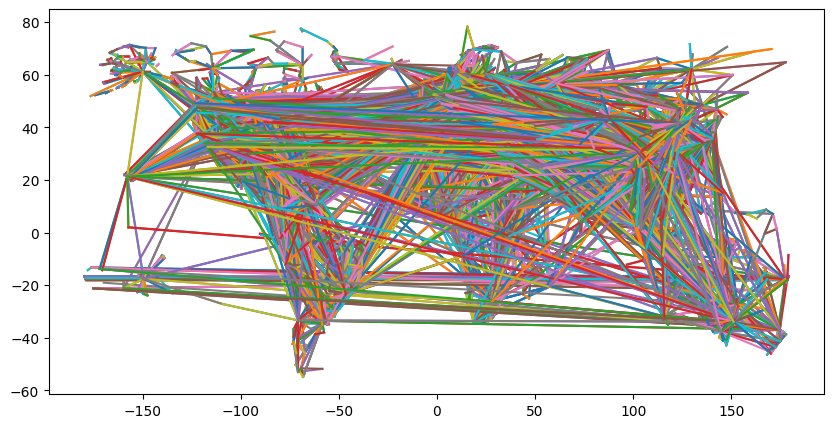

In [16]:
latiw = routesWorld.source_airport_lat.to_numpy()
lngiw = routesWorld.source_airport_lng.to_numpy()
latfw = routesWorld.destination_airport_lat.to_numpy()
lngfw = routesWorld.destination_airport_lng.to_numpy()

fig = plt.figure(figsize=(10,5))

for i in range(len(latiw)):
    plt.plot([lngiw[i], lngfw[i]], [latiw[i], latfw[i]] , '-')

In [17]:
routesWorldSouthAmerica = routesWorld[(routesWorld['source_airport_continent'] == 'SA') | (routesWorld['destination_airport_continent'] == 'SA' )]
routesWorldSouthAmerica

,source_airport,destination_airport,source_airport_name,source_airport_lat,source_airport_lng,source_airport_country,source_airport_continent,destination_airport_name,destination_airport_lat,destination_airport_lng,destination_airport_continent,destination_airport_country
313,RBQ,LPB,Rurrenabaque Airport,-14.427900,-67.496803,BO,SA,El Alto International Airport,-16.513300,-68.192299,SA,BO
314,RBQ,TDD,Rurrenabaque Airport,-14.427900,-67.496803,BO,SA,Teniente Av. Jorge Henrich Arauz Airport,-14.818700,-64.917999,SA,BO
315,VDC,GRU,Glauber de Andrade Rocha Airport,-14.907885,-40.914804,BR,SA,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,SA,BR
316,VDC,SSA,Glauber de Andrade Rocha Airport,-14.907885,-40.914804,BR,SA,Deputado Luiz Eduardo Magalhães International ...,-12.908611,-38.322498,SA,BR
317,VDC,CNF,Glauber de Andrade Rocha Airport,-14.907885,-40.914804,BR,SA,Tancredo Neves International Airport,-19.635710,-43.966928,SA,BR
...,...,...,...,...,...,...,...,...,...,...,...,...
29021,POS,PBM,Piarco International Airport,10.595400,-61.337200,TT,NaN,Johan Adolf Pengel International Airport,5.452830,-55.187801,SA,SR
29028,POS,CCS,Piarco International Airport,10.595400,-61.337200,TT,NaN,Simón Bolívar International Airport,10.601194,-66.991222,SA,VE
29029,POS,GEO,Piarco International Airport,10.595400,-61.337200,TT,NaN,Cheddi Jagan International Airport,6.498550,-58.254101,SA,GY
29040,POS,PMV,Piarco International Airport,10.595400,-61.337200,TT,NaN,Del Caribe Santiago Mariño International Airport,10.912603,-63.966599,SA,VE


In [25]:
latiwsa = routesWorldSouthAmerica.source_airport_lat.to_numpy()
lngiwsa = routesWorldSouthAmerica.source_airport_lng.to_numpy()
latfwsa = routesWorldSouthAmerica.destination_airport_lat.to_numpy()
lngfwsa = routesWorldSouthAmerica.destination_airport_lng.to_numpy()

datajsonworldroutes = []

for i in range(len(latiwsa)):
        
    datajsonworldroutes.append({ "lati": latiwsa[i], "lngi": lngiwsa[i], "latf": latfwsa[i], "lngf": lngfwsa[i]})
    
save_file3 = open("routes_world.json", "w") 
json.dump(datajsonworldroutes, save_file3, indent = 6) 
save_file3.close() 

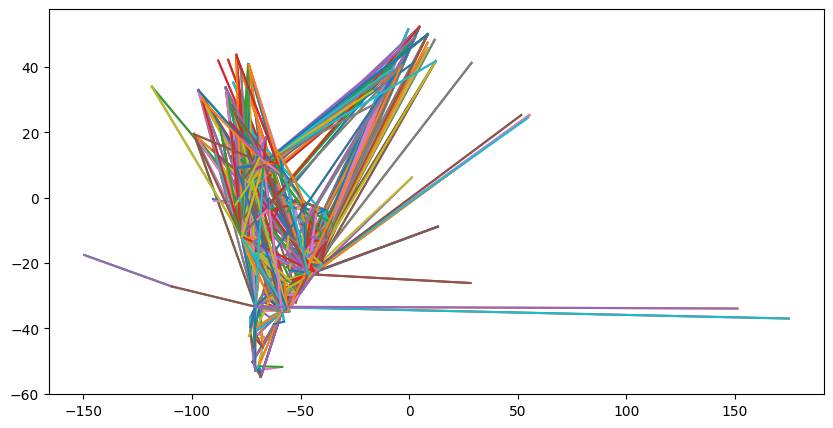

In [26]:
fig = plt.figure(figsize=(10,5))

for i in range(len(latiwsa)):
    plt.plot([lngiwsa[i], lngfwsa[i]], [latiwsa[i], latfwsa[i]] , '-')